In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
import keras as kr
from sklearn.model_selection import train_test_split

import os 
from os import getcwd
from os.path import dirname,abspath
import pathlib as pl

import sys

home_path = "C:\\sebin\\ecg"
git_path = home_path+"\\ecg_data_wfdb"

sys.path.append(git_path)
from use.segment.pick import random_ecg
from use.segment.open import ecgtodf
from use.tensor.input import x_tensor_input,y_tensor_input

from sklearn.preprocessing import MinMaxScaler

In [3]:
#data
'''
02-04 
no faced beat
train : each seg 100 / q beat 15 -> 415 
epoch : 500 
'''
#preprocessing: min - max scaler
#epoch


#validation


'\n02-04 \nno faced beat\ntrain : each seg 100 / q beat 15 -> 415 \nepoch : 500 \n'

In [4]:
#1. file open to dataframe

In [5]:
input_folder = abspath(home_path+"\\save\\4beat_remove\\type2")
output_folder = abspath(home_path+"\\pick\\model02\\04")
vali_folder = abspath(home_path+"\\pick\\model02\\04\\validation")
test_folder = abspath(home_path+"\\pick\\model02\\04\\test\\02")

In [6]:
#random_ecg(100,input_folder,output_folder)



In [7]:
random_ecg(100,input_folder,vali_folder)
random_ecg(100,input_folder,test_folder)

random_ecg
random_ecg


In [8]:
def to_mixmax_tensor(path):
    data = pd.DataFrame(ecgtodf(path))
    data=data.sample(frac=1)

    record = data.iloc[:,:288]
    ann = data.iloc[:,288]


    t_record = record.T
    scaler = MinMaxScaler()
    scaler.fit(t_record)
    after_record = scaler.transform(t_record).T


    record = pd.DataFrame(after_record)
    ann = pd.DataFrame(ann)

    x=x_tensor_input(record)
    y=y_tensor_input(ann)

    return x,y

In [9]:
train_x,train_y = to_mixmax_tensor(output_folder+"\\1_all")
validation_x,validation_y = to_mixmax_tensor(vali_folder+"\\1_all")
test_x,test_y = to_mixmax_tensor(test_folder+"\\1_all")

100_1085.csv
100_2058.csv
100_624.csv
100_786.csv
101_135.csv
101_360.csv
101_899.csv
103_1187.csv
103_1718.csv
103_221.csv
103_49.csv
103_821.csv
105_1724.csv
105_1729.csv
105_1740.csv
105_1842.csv
105_2352.csv
105_345.csv
106_1268.csv
106_1310.csv
106_1354.csv
106_1445.csv
106_1466.csv
106_1679.csv
106_1751.csv
106_922.csv
108_1129.csv
108_1743.csv
108_292.csv
109_1183.csv
109_2499.csv
109_758.csv
111_164.csv
111_776.csv
113_1045.csv
113_392.csv
114_1710.csv
114_233.csv
114_314.csv
114_666.csv
114_760.csv
114_952.csv
115_890.csv
116_1608.csv
118_1219.csv
118_1252.csv
118_1330.csv
118_1914.csv
118_2191.csv
118_344.csv
119_1126.csv
119_1386.csv
119_161.csv
119_1641.csv
119_1975.csv
119_378.csv
119_938.csv
121_1555.csv
122_1448.csv
122_1799.csv
122_2320.csv
122_45.csv
123_1178.csv
123_352.csv
124_1497.csv
124_264.csv
124_778.csv
124_799.csv
200_1431.csv
200_1515.csv
200_1701.csv
200_1741.csv
200_1998.csv
200_2004.csv
200_2239.csv
200_2269.csv
200_2289.csv
200_2589.csv
200_27.csv
200_273

In [10]:
model = kr.models.load_model("C:\\sebin\\ecg\\ecg_data_wfdb\\model\\save\\02.h5")

In [11]:
model.compile(loss='sparse_categorical_crossentropy' ,optimizer='adam',metrics=['accuracy'])

In [12]:
history = model.fit(train_x,train_y,epochs=500,validation_data=(validation_x,validation_y))

Epoch 1/500
13/13 [==============================] - 1s 15ms/step - loss: 1.5763 - accuracy: 0.2434 - val_loss: 1.5390 - val_accuracy: 0.2410
Epoch 2/500
13/13 [==============================] - 0s 7ms/step - loss: 1.4836 - accuracy: 0.2410 - val_loss: 1.4755 - val_accuracy: 0.2482
Epoch 3/500
13/13 [==============================] - 0s 7ms/step - loss: 1.4420 - accuracy: 0.3542 - val_loss: 1.4333 - val_accuracy: 0.4651
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 1.3681 - accuracy: 0.4482 - val_loss: 1.3768 - val_accuracy: 0.4602
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 1.2757 - accuracy: 0.5711 - val_loss: 1.2986 - val_accuracy: 0.4988
Epoch 6/500
13/13 [==============================] - 0s 7ms/step - loss: 1.1690 - accuracy: 0.6000 - val_loss: 1.1855 - val_accuracy: 0.5614
Epoch 7/500
13/13 [==============================] - 0s 7ms/step - loss: 1.0410 - accuracy: 0.6313 - val_loss: 1.0710 - val_accuracy: 0.6169
Epoch 8/500


In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

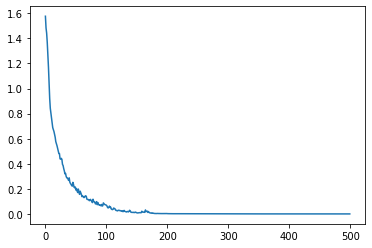

In [14]:
plt.plot(loss)

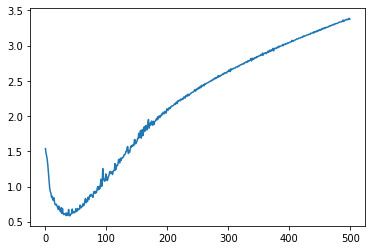

In [15]:
plt.plot(val_loss)

In [16]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

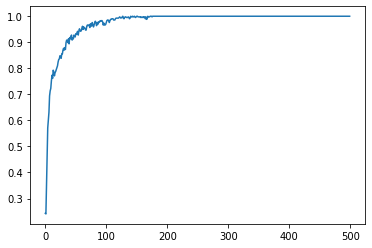

In [17]:
plt.plot(accuracy)

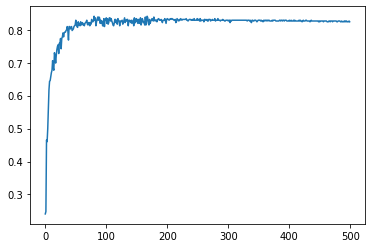

In [18]:
plt.plot(val_accuracy)

In [19]:
model.save(git_path+"\\test\\02\\05\\model.h5")

In [20]:
results = model.evaluate(test_x,test_y)

13/13 [==============================] - 0s 1ms/step - loss: 2.3199 - accuracy: 0.8578
